<a href="https://colab.research.google.com/github/Lucyfer1865/MNIST_Classification_Model/blob/main/MNIST_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:

#Define training and testin dataset
train_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4365717.17it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 63454.19it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 241739.45it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3144170.45it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
from torch.utils.data import DataLoader

# loaders dictionary to create DataLoaders to train and test the data
loaders = {
    'train': DataLoader(train_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1 ),
    'test' : DataLoader(test_data,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1 )
}

In [ ]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7a2446ec2860>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7a2446ec2050>}

In [ ]:
import torch.nn as nn           # NN layers and functions
import torch.nn.functional as F # Activation Functions
import torch.optim as optim     # Optimization module

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5) #Defines convolutional layer with (Input Chanel, Output Chanel, Kernel Seize)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d() #Dropout layer to avoid overfitting
    self.fc1 = nn.Linear(320, 50) #Defines fully connected layer with (Input, Output)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2)) # ReLu on 2x2 Down-sampling of feature maps
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320) # Flatten the convolutional layer to input in fully connected layer
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    return F.softmax(x)


In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr = 0.001) # Initializes Adam optimizer with parameters and learning rate

loss_fn = nn.CrossEntropyLoss() # Initializes CrossEntropyLoss for classification

def train(epoch):
  model.train()

  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)

    optimizer.zero_grad()  # Clear gradients from prev iter
    output = model(data)  # Forward pass
    loss = loss_fn(output, target)  # Calculate loss
    loss.backward()  # Backpropagation using the loss
    optimizer.step()  # Update weights

    if batch_idx % 25 == 0:
      print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100.*batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")

def test():
  model.eval()

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)

      output = model(data)
      test_loss += loss_fn(output, target).item() # Total sum of losses
      pred = output.argmax(dim=1, keepdim=True) # Get predicted value
      correct += pred.eq(target.view_as(pred)).sum().item() # Count correct predictions

  test_loss /= len(loaders['test'].dataset)  # Average test loss
  print(f"\nTest set: Average Loss: {test_loss:.4f},  Accuracy {correct}/{len(loaders['test'].dataset)} ({100.*correct / len(loaders['test'].dataset):.0f}%)\n")


In [ ]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-7-9781effad0d6>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.304666
Train Epoch: 1 [2500/60000 (4%)]	2.273057
Train Epoch: 1 [5000/60000 (8%)]	2.072690
Train Epoch: 1 [7500/60000 (12%)]	1.898993
Train Epoch: 1 [10000/60000 (17%)]	1.825292
Train Epoch: 1 [12500/60000 (21%)]	1.803412
Train Epoch: 1 [15000/60000 (25%)]	1.699899
Train Epoch: 1 [17500/60000 (29%)]	1.654864
Train Epoch: 1 [20000/60000 (33%)]	1.685600
Train Epoch: 1 [22500/60000 (38%)]	1.656594
Train Epoch: 1 [25000/60000 (42%)]	1.709967
Train Epoch: 1 [27500/60000 (46%)]	1.630583
Train Epoch: 1 [30000/60000 (50%)]	1.670580
Train Epoch: 1 [32500/60000 (54%)]	1.637813
Train Epoch: 1 [35000/60000 (58%)]	1.704246
Train Epoch: 1 [37500/60000 (62%)]	1.625136
Train Epoch: 1 [40000/60000 (67%)]	1.617599
Train Epoch: 1 [42500/60000 (71%)]	1.620477
Train Epoch: 1 [45000/60000 (75%)]	1.644232
Train Epoch: 1 [47500/60000 (79%)]	1.639624
Train Epoch: 1 [50000/60000 (83%)]	1.720173
Train Epoch: 1 [52500/60000 (88%)]	1.620804
Train Epoch: 1 [55000/60000 (92%)]	1.59740

Prediction: 3


<ipython-input-7-9781effad0d6>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


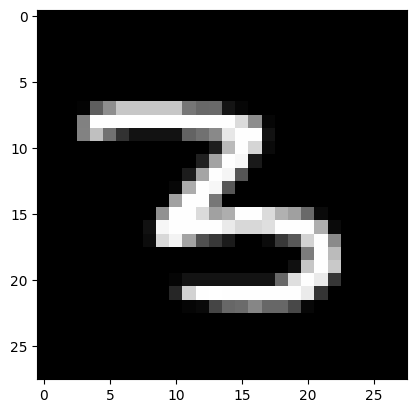

In [ ]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[528]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f"Prediction: {prediction}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()
